In [1]:
import pennylane as qml
from pennylane import numpy as npp
from matplotlib import pyplot as plt

# set the random seed
npp.random.seed(42)

# create a device to execute the circuit on
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev, diff_method="parameter-shift", interface="autograd")
def circuit(params,inputs):
    qml.RX(inputs[0], wires=0)
    qml.RX(inputs[1], wires=1)
    qml.RX(inputs[2], wires=2)
    qml.RX(inputs[3], wires=3)
    
    qml.RY(0.25*np.pi, wires=0)
    qml.RY(0.25*np.pi, wires=1)
    qml.RY(0.25*np.pi, wires=2)
    qml.RY(0.25*np.pi, wires=3)
    
    qml.RZ(0.25*np.pi, wires=0)
    qml.RZ(0.25*np.pi, wires=1)
    qml.RZ(0.25*np.pi, wires=2)
    qml.RZ(0.25*np.pi, wires=3)
    
    
    

    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RY(params[3], wires=3)
    qml.RZ(params[4], wires=0)
    qml.RZ(params[5], wires=1)
    qml.RZ(params[6], wires=2)
    qml.RZ(params[7], wires=3)
    

    qml.broadcast(qml.CNOT, wires=[0, 1, 2,3], pattern="all_to_all")
    
    
    qml.RX(inputs[0], wires=0)
    qml.RX(inputs[1], wires=1)
    qml.RX(inputs[2], wires=2)
    qml.RX(inputs[3], wires=3)
    
    qml.RY(0.25*np.pi, wires=0)
    qml.RY(0.25*np.pi, wires=1)
    qml.RY(0.25*np.pi, wires=2)
    qml.RY(0.25*np.pi, wires=3)
    
    qml.RZ(0.25*np.pi, wires=0)
    qml.RZ(0.25*np.pi, wires=1)
    qml.RZ(0.25*np.pi, wires=2)
    qml.RZ(0.25*np.pi, wires=3)
    
    
    

    qml.RY(params[8], wires=0)
    qml.RY(params[9], wires=1)
    qml.RY(params[10], wires=2)
    qml.RY(params[11], wires=3)
    qml.RZ(params[12], wires=0)
    qml.RZ(params[13], wires=1)
    qml.RZ(params[14], wires=2)
    qml.RZ(params[15], wires=3)
    

    qml.broadcast(qml.CNOT, wires=[0, 1, 2,3], pattern="all_to_all")
    
    
    
    qml.RX(inputs[0], wires=0)
    qml.RX(inputs[1], wires=1)
    qml.RX(inputs[2], wires=2)
    qml.RX(inputs[3], wires=3)
    
    qml.RY(0.25*np.pi, wires=0)
    qml.RY(0.25*np.pi, wires=1)
    qml.RY(0.25*np.pi, wires=2)
    qml.RY(0.25*np.pi, wires=3)
    
    qml.RZ(0.25*np.pi, wires=0)
    qml.RZ(0.25*np.pi, wires=1)
    qml.RZ(0.25*np.pi, wires=2)
    qml.RZ(0.25*np.pi, wires=3)
    
    
    

    qml.RY(params[16], wires=0)
    qml.RY(params[17], wires=1)
    qml.RY(params[18], wires=2)
    qml.RY(params[19], wires=3)
    qml.RZ(params[20], wires=0)
    qml.RZ(params[21], wires=1)
    qml.RZ(params[22], wires=2)
    qml.RZ(params[23], wires=3)
    

    qml.broadcast(qml.CNOT, wires=[0, 1, 2,3], pattern="all_to_all")
    

    


    
    #return qml.expval(qml.PauliX(0) @ qml.PauliI(1)@ qml.PauliY(2)@ qml.PauliI(3))
    return qml.expval(qml.PauliX(0) @  qml.PauliY(2))

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split 
import scipy.stats as stats
import math

def norminv(x):
    return ((1.0/math.sqrt(2.0*math.pi)) * math.exp(-x*x*0.5))

def d1(S0, K, r, T, sigma, q):
    deno = (sigma * math.sqrt(T))
    if (deno==0):
        return 0
    logReturns = math.log(S0/float(K)) if ((S0/float(K)) > 0.0) else 0.0
    return (float(logReturns) + (float(r) - float(q) + float(sigma)*float(sigma)*0.5)*float(T)) / float(deno)
    
def d2(S0, K, r, T, sigma, q):
        return d1(S0, K, r, T, sigma, q)-sigma*math.sqrt(T)
        
def bsformula(callput, S0, K, r, T, sigma, q=0):
    N = stats.norm.cdf
                
    def optionValueOfCall(S0, K, r, T, sigma, q):       
        _d1 = d1(S0, K, r, T, sigma, q)
        _d2 = d2(S0, K, r, T, sigma, q)
        return S0*math.exp(-q*T)*N(_d1)- K*math.exp(-r*T)*N(_d2)
      
    def optionValueOfPut(S0, K, r, T, sigma, q):
        _d1 = d1(S0, K, r, T, sigma, q)
        _d2 = d2(S0, K, r, T, sigma, q)
        return float(K)*math.exp(-float(r)*float(T))*N(-_d2) - float(S0)*math.exp(-float(q)*float(T))*N(-_d1)
        
    def delta(callput, S0, K, r, T, sigma, q):
        _d1 = d1(S0, K, r, T, sigma, q)        
        if callput.lower() == "call":            
            return N(_d1) * math.exp(-q*T)
        else:
            return (N(_d1)-1)* math.exp(-q*T)
    
    def vega(S0, K, r, T, sigma, q):
        _d1 = d1(S0, K, r, T, sigma, q)
        return S0  * math.sqrt(T) * norminv(_d1)  * math.exp(-q*T)
    
    if callput.lower()=="call":
        optionValue = optionValueOfCall(S0, K, r, T, sigma, q)
    else:
        optionValue = optionValueOfPut(S0, K, r, T, sigma, q)
        
    _delta = delta(callput, S0, K, r, T, sigma, q)
    _vega = vega(S0, K, r, T, sigma, q)
    
    return (optionValue, _delta, _vega)

def bsm_iv_generator(num_sample = 100,tao_bound=[0.01,2.0],  sigma_bound=[0.01,2.0], 
                     money_bound=[0.3,3.0], rr_bound=[0.01,0.2], callput='call', seed=42):
    
    # input parameters: when callput is not in 'call' or 'put', randomly generate the option price followed by root-finding methods to
    # compute the corresponding implied vol
    # return: X_input = [time,stock,rr, dividen, option_price]. Y_outpu  = volatility 
    np.random.seed(seed)
    tao_min,tao_max = tao_bound[0],tao_bound[1]
    
    sigma_min, sigma_max = sigma_bound[0],sigma_bound[1]
    moneyness_min,moneyness_max = money_bound[0],money_bound[1]
    rr_min,rr_max = rr_bound[0],rr_bound[1]
   
    

    num_sample = int(num_sample)
    xx = np.zeros([num_sample,4],dtype='float')
    
   
    xx[:,0] = np.random.uniform(sigma_min, sigma_max,xx.shape[0])
    xx[:,1] = np.random.uniform(tao_min,tao_max,xx.shape[0])
    xx[:,2] = np.random.uniform(moneyness_min,moneyness_max,xx.shape[0])
    xx[:,3] = np.random.uniform(rr_min,rr_max,xx.shape[0])
   
    
   
    strike=1.0 #fixed strike
    #callput = 'call' # call option
    v = np.zeros(xx.shape[0]) # option value
    k = np.ones(xx.shape[0]) # strike price, just in order to match the shape of v
    
    if callput in ['call','put']:        
        for i in range(0,xx.shape[0]):        
            sigma, T, S0, interest = xx[i,0],xx[i,1],xx[i,2],xx[i,3]
            ## use the Black-Schole function in compfin.py
            v[i] = bsformula(callput, S0, strike, interest, T, sigma)[0]              
            
  
    v= v.reshape(xx.shape[0],1)     
    xx_sample = np.concatenate((xx,v),axis=1) #sigma, time, s, r, v
    
    
    X_input   = xx_sample[:,1:]   # time,stock,rr, option_price
    Y_output  =  xx_sample[:,0] # sigma -implied volatility is the predictive variable.
  
    return X_input,Y_output
#  log-transformation of the option value
def logscale_vol(x_train_dat,y_train_dat,otm_lower=0.0000001):
   # input data: x_train_dat = [time,stock,rr, option_price], y_train_dat = sigma  
   
    xtv_train_log=x_train_dat.copy()    
    ytv_train_log =y_train_dat.copy()
    
    
    #v_lower[v_lower<0.0]=0.0 # V=max(S-E*exp(-rt),0)  
    xintrinsic_train=xtv_train_log[:,1]-1.0*np.exp(-1.0*xtv_train_log[:,2]*xtv_train_log[:,0])
    xintrinsic_train[xintrinsic_train<0.0]=0.0 ## \tilde{V} = max(S-E*exp(-rt),0)
    xtv_train_log[:,-1] = xtv_train_log[:,-1] -xintrinsic_train
    
    ## remove intrisinc values below the threshold (otm_lower \approx machine pricision)  
   
    ytv_train_log = ytv_train_log[~np.less(xtv_train_log[:,-1],otm_lower)]
    xtv_train_log = xtv_train_log[~np.less(xtv_train_log[:,-1],otm_lower),:]
    xtv_train_log[:,-1]=np.log(xtv_train_log[:,-1])

    return xtv_train_log,ytv_train_log 

maturity time  range:
0.5005061583846219 0.5990505142000673
Stock price  range:
0.9804335060592119 1.0199887069314453
interest rate  range:
0.030905509191042024 0.07949801161949727
option value  range:
0.08888444152061992 0.23235287647915875
sigma range:
0.30220884684944094 0.6947547746402069
(200, 4)
maturity time  range:
0.5005061583846219 0.5990505142000673
Stock price  range:
0.9804335060592119 1.0199887069314453
interest rate  range:
0.030905509191042024 0.07949801161949727
time option-value  range:
-2.7492594136365516 -1.6546771696911975
sigma range:
0.30220884684944094 0.6942601816442402
(160, 4)
Parameters: [0.70723863 0.15253904 0.57628836 0.60671505 0.42413067 0.73644424
 0.93436701 0.92556851 0.45083937 0.11323805 0.9848412  0.83889809
 0.12466268 0.92084188 0.86989636 0.51883806 0.59127544 0.3990027
 0.05476164 0.33519724 0.80285345 0.00463202 0.33349917 0.39816869]
inputs: [0.5373956  0.91985562 0.34634599 0.3469532 ]
Expectation value: -0.07853671216985653


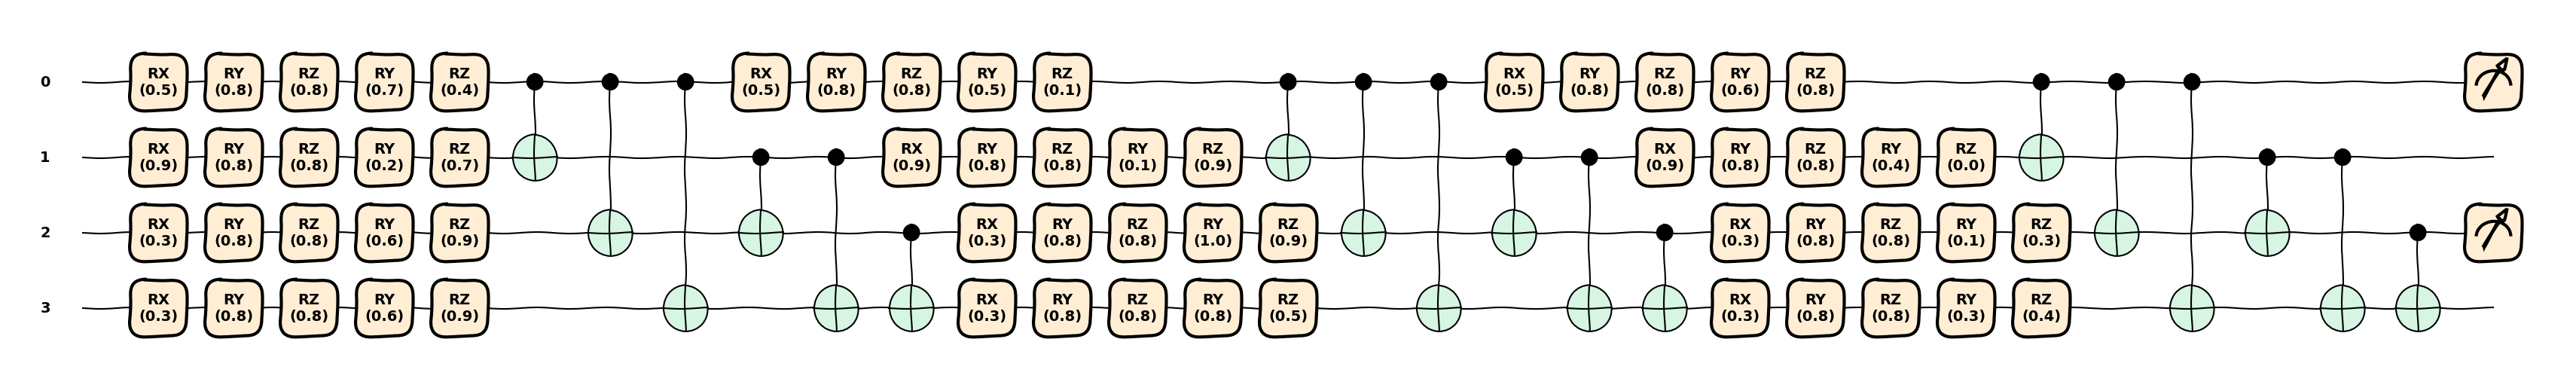

In [3]:
Xin_input,Yin_output=bsm_iv_generator(num_sample = 200,tao_bound=[0.5,0.6],  sigma_bound=[0.3,0.7], 
                                      money_bound=[0.98,1.02], rr_bound=[0.03,0.08],callput='call')

#check the data value range on each dimension
## xin = [maturity time, Stock price, interest rate, dividend, option value]

xlabel =  ['maturity time', 'Stock price', 'interest rate','option value']
for i in range(0, len(xlabel)):
    print(xlabel[i]+'  range:')
    print(np.min(Xin_input[:,i]),np.max(Xin_input[:,i]))
    
print('sigma range:')
print(np.min(Yin_output),np.max(Yin_output))
print(np.shape(Xin_input))

# generate and shuffle the data set into training and test part
xtv_train_log_all,ytv_train_log_all=logscale_vol(Xin_input,Yin_output,otm_lower=1e-4)
'''
for i in range(4):
    xtv_train_log_all[:,i]= min_max_normalization(xtv_train_log_all[:,i])
'''
#ytv_train_log_all=ytv_train_log_all/2
xtv_train_log,xtv_test_log, ytv_train_log, ytv_test_log   = train_test_split(xtv_train_log_all,ytv_train_log_all,test_size=0.2,random_state=42)

xlabel =  ['maturity time', 'Stock price', 'interest rate','time option-value']
for i in range(0, len(xlabel)):
    print(xlabel[i]+'  range:')
    print(np.min(xtv_train_log_all[:,i]),np.max(xtv_train_log_all[:,i]))
    
print('sigma range:')
print(np.min(ytv_train_log),np.max(ytv_train_log))
## how many samples after cleaning
print(np.shape(xtv_train_log))


params = npp.random.random([24], requires_grad=True)
inputs = npp.random.random([4], requires_grad=True)
print("Parameters:", params)
print("inputs:", inputs)
print("Expectation value:", circuit(params,inputs))


qnode = qml.QNode(circuit, dev)
qml.draw_mpl(circuit, decimals=1, style="sketch")(params,inputs)
plt.show()

In [4]:
def parameter_shift_term(qnode,params,inputs, i):
    shifted = params.copy()
    shifted[i] += np.pi/2
    forward = qnode(shifted,inputs)  # forward evaluation

    shifted[i] -= np.pi
    backward = qnode(shifted,inputs) # backward evaluation

    return 0.5 * (forward - backward)

# gradient with respect to the first parameter
print(parameter_shift_term(circuit,params,inputs, 0))


def parameter_shift(qnode, params,inputs):
    gradients = np.zeros([len(params)])

    for i in range(len(params)):
        gradients[i] = parameter_shift_term(qnode,params,inputs, i)

    return gradients

print(parameter_shift(circuit, params,inputs))

grad_function = qml.grad(circuit)
print(grad_function(params,inputs)[0])


print(qml.gradients.param_shift(circuit)(params,inputs)[0])

0.2698650834031996
[ 2.69865083e-01  3.77286259e-01 -3.67579249e-02  9.25503786e-02
  7.10056736e-02 -4.99647645e-02  6.25190076e-02  7.77278732e-02
  9.97374792e-02 -2.08419143e-01 -1.91716087e-01 -6.41052221e-02
  1.65782810e-01 -6.95739292e-02 -5.10119223e-02  8.17583646e-02
  1.32313400e-01  7.06095065e-04 -2.83512186e-01  0.00000000e+00
  3.23455688e-01  1.58036943e-01 -1.38777878e-17 -8.32667268e-17]
[ 2.69865083e-01  3.77286259e-01 -3.67579249e-02  9.25503786e-02
  7.10056736e-02 -4.99647645e-02  6.25190076e-02  7.77278732e-02
  9.97374792e-02 -2.08419143e-01 -1.91716087e-01 -6.41052221e-02
  1.65782810e-01 -6.95739292e-02 -5.10119223e-02  8.17583646e-02
  1.32313400e-01  7.06095065e-04 -2.83512186e-01  0.00000000e+00
  3.23455688e-01  1.58036943e-01 -1.38777878e-17 -8.32667268e-17]
[ 2.69865083e-01  3.77286259e-01 -3.67579249e-02  9.25503786e-02
  7.10056736e-02 -4.99647645e-02  6.25190076e-02  7.77278732e-02
  9.97374792e-02 -2.08419143e-01 -1.91716087e-01 -6.41052221e-02
  1.

In [5]:
from sklearn import metrics
from itertools import chain
import time
def QNN(weights, angles):
    return circuit(weights, angles)

def cost(weights, features, labels):
    predictions = [QNN(weights, f) for f in features]
    
    return square_loss(labels, predictions)

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

def R2(labels, predictions):

    r2 = 0
    for l, p in zip(labels, predictions):
        r2 = r2 + metrics.r2_score(labels, predictions)
    r2 = r2 / len(labels)

    return r2

In [6]:
X=xtv_train_log
Y=ytv_train_log
weights_init = npp.random.random([24], requires_grad=True)
opt = qml.AdamOptimizer(0.01)
batch_size = 64
batches = len (X) // batch_size
X_batches = npp.array_split(npp.arange(len(X)) , batches)


epoch 1
-------------------------------
batch_idx: 0 loss: 0.15120217488190962 R2: -10.269581568932821 time: 1704189833.2129142
batch_idx: 1 loss: 0.14026962890753286 R2: -8.828347068822874 time: 1704189889.2732472
Training [0%] Loss: 0.14573590189472124 time: 1704189889.2732472
weight: [ 0.72721844  0.1725241   0.59579137  0.62637072  0.44412992  0.71648819
  0.91438832  0.90556684  0.47082262  0.09323459  0.9648318   0.81890033
  0.14466505  0.90088242  0.8898284   0.53883155  0.61127402  0.40817956
  0.03478128  0.33519724  0.82286131 -0.01534602  0.33349917  0.39816869]
epoch 2
-------------------------------
batch_idx: 0 loss: 0.11363782958086274 R2: -7.502878482263645 time: 1704189944.6647303
batch_idx: 1 loss: 0.10449525295493314 R2: -6.291533154588047 time: 1704189998.8452928
Training [1%] Loss: 0.10906654126789794 time: 1704189998.8452928
weight: [ 0.74691112  0.19231857  0.60584306  0.64468895  0.46402312  0.6969396
  0.89471205  0.88563686  0.49057045  0.07328315  0.94479524

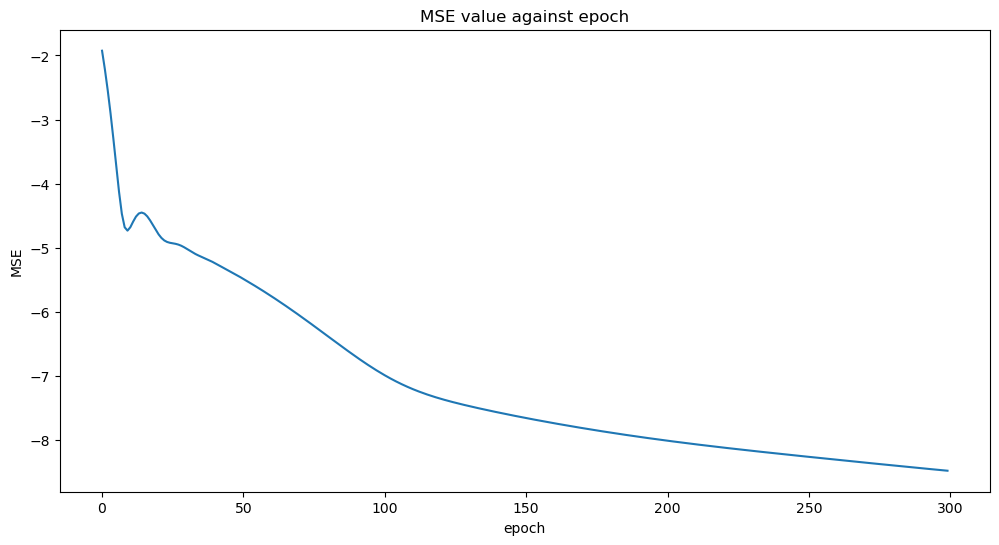

In [7]:
'''
weights =[0.68756473 , 1.2864305 ,  0.5411694 , -0.01524038 , 0.5852044 ,  0.6762012,
  0.35593897 , 0.22628789,  0.38244092,  0.35140917,  0.86482936 , 0.8531242,
  0.09241156 , 0.6720707  , 0.38071635,  0.95416117 , 0.63409   ,  0.40179932,
  0.7345088  , 0.6243114  , 0.3178202 , -0.2618623  , 0.18122938,  1.0447433,
  0.48699683 , 0.7739934  , 0.38703147 , 0.48046085,  0.5525667 ,  0.52838504,
  0.28538367 , 0.30099392,  0.74503726 , 0.67772216,  0.3839896 ,  0.417687]
weights = npp.array(weights, requires_grad=True)
'''
weights = params
loss_list=[]
r2_list=[]

n_epochs=300

start_time=time.time()
for epoch in range(n_epochs):
    total_loss  = []
    total_r2  = []
    print(f"epoch {epoch+1}\n-------------------------------")
    for it, batch_index in enumerate (chain(*[X_batches])):
        # Update the weights by one optimizer step
        
        X_batch = X[batch_index]
        Y_batch = Y[batch_index]
        weights, _, _ = opt.step(cost, weights, X_batch, Y_batch)

        # Compute accuracy
        predictions = [QNN(weights, x) for x in X]
        r2 = R2(Y, predictions)
        cost_t=cost(weights,X_batch,Y_batch)
        total_loss.append(cost_t)
        total_r2.append(r2)
        end_timet=time.time()
        print("batch_idx:",it,"loss:",cost_t,"R2:",r2,"time:",end_timet)
    loss_list.append(sum(total_loss)/len(total_loss))
    r2_list.append(sum(total_r2)/len(total_r2))
    print('Training [{:.0f}%]'.format(100. * (epoch + 1) / n_epochs),"Loss:", loss_list[-1], "time:",end_timet)
    print("weight:",weights)
    
    
predictions = [QNN(weights, x) for x in X]

train_R2 = R2(Y, predictions)
train_MSE=metrics.mean_squared_error(Y,predictions)
train_RMSE=train_MSE**(1/2)
train_MAE=metrics.mean_absolute_error(Y,predictions)
train_MAPE=metrics.mean_absolute_percentage_error(Y,predictions)

print("train_MSE:",train_MSE)
print("train_RMSE:",train_RMSE)
print("train_MAE:",train_MAE)
print("train_MAPE:",train_MAPE)
print("train_R2:",train_R2)

plt.rcParams["figure.figsize"] = (12, 6)

plt.title("MSE value against epoch")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.plot(range(len(loss_list)), np.log(loss_list))
plt.show()

epoch 1
-------------------------------
batch_idx: 0 loss: 0.00022400546485129043 R2: 0.9849829498851086 time: 1704229468.3639066
batch_idx: 1 loss: 0.00018992213477594976 R2: 0.9850136568755067 time: 1704229523.5330586
Training [0%] Loss: 0.0002069637998136201 time: 1704229523.5330586
weight: [ 9.41899720e-01  3.77722420e-01  9.29823348e-01 -8.57912463e-01
  9.03902064e-01  1.23324953e+00  7.27551788e-01  3.87382767e-01
  5.48459453e-01  8.10551123e-04  1.20359621e+00 -7.50730248e-01
  5.42721529e-01  6.91926149e-01  5.62027418e-01  7.12329831e-01
  9.58348943e-01  9.81280215e-01 -6.62610712e-02  3.35197242e-01
  1.21602344e+00 -4.19283000e-02  3.33499172e-01  3.98168694e-01]
epoch 2
-------------------------------
batch_idx: 0 loss: 0.00022310421569643373 R2: 0.9850440711106108 time: 1704229576.7763884
batch_idx: 1 loss: 0.00018912634845151796 R2: 0.9850744992606046 time: 1704229629.8639657
Training [1%] Loss: 0.00020611528207397585 time: 1704229629.8639657
weight: [ 9.42338283e-01  

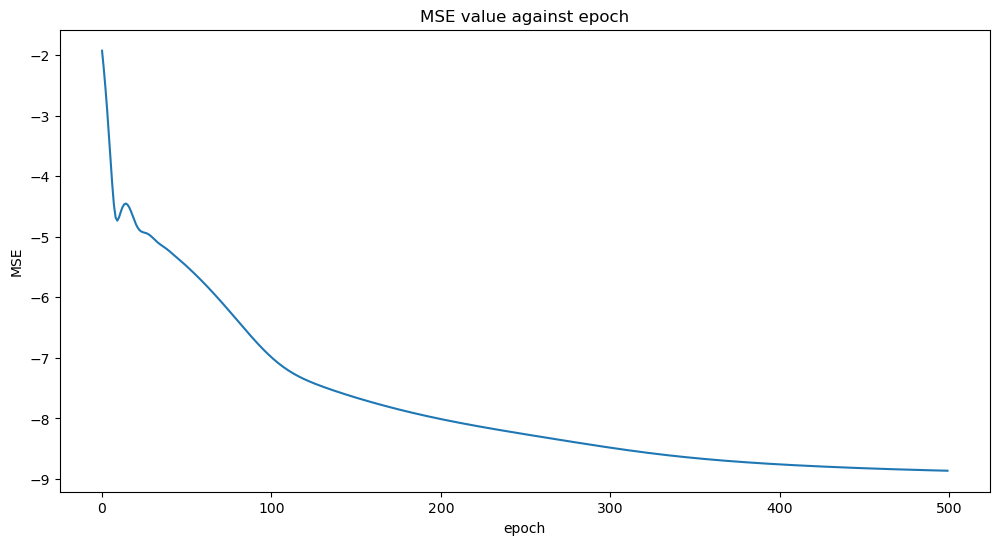

In [20]:
n_epochs=200

start_time=time.time()
for epoch in range(n_epochs):
    total_loss  = []
    total_r2  = []
    print(f"epoch {epoch+1}\n-------------------------------")
    for it, batch_index in enumerate (chain(*[X_batches])):
        # Update the weights by one optimizer step
        
        X_batch = X[batch_index]
        Y_batch = Y[batch_index]
        weights, _, _ = opt.step(cost, weights, X_batch, Y_batch)

        # Compute accuracy
        predictions = [QNN(weights, x) for x in X]
        r2 = R2(Y, predictions)
        cost_t=cost(weights,X_batch,Y_batch)
        total_loss.append(cost_t)
        total_r2.append(r2)
        end_timet=time.time()
        print("batch_idx:",it,"loss:",cost_t,"R2:",r2,"time:",end_timet)
    loss_list.append(sum(total_loss)/len(total_loss))
    r2_list.append(sum(total_r2)/len(total_r2))
    print('Training [{:.0f}%]'.format(100. * (epoch + 1) / n_epochs),"Loss:", loss_list[-1], "time:",end_timet)
    print("weight:",weights)
    
    
predictions = [QNN(weights, x) for x in X]

train_R2 = R2(Y, predictions)
train_MSE=metrics.mean_squared_error(Y,predictions)
train_RMSE=train_MSE**(1/2)
train_MAE=metrics.mean_absolute_error(Y,predictions)
train_MAPE=metrics.mean_absolute_percentage_error(Y,predictions)

print("train_MSE:",train_MSE)
print("train_RMSE:",train_RMSE)
print("train_MAE:",train_MAE)
print("train_MAPE:",train_MAPE)
print("train_R2:",train_R2)

plt.rcParams["figure.figsize"] = (12, 6)

plt.title("MSE value against epoch")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.plot(range(len(loss_list)), np.log(loss_list))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

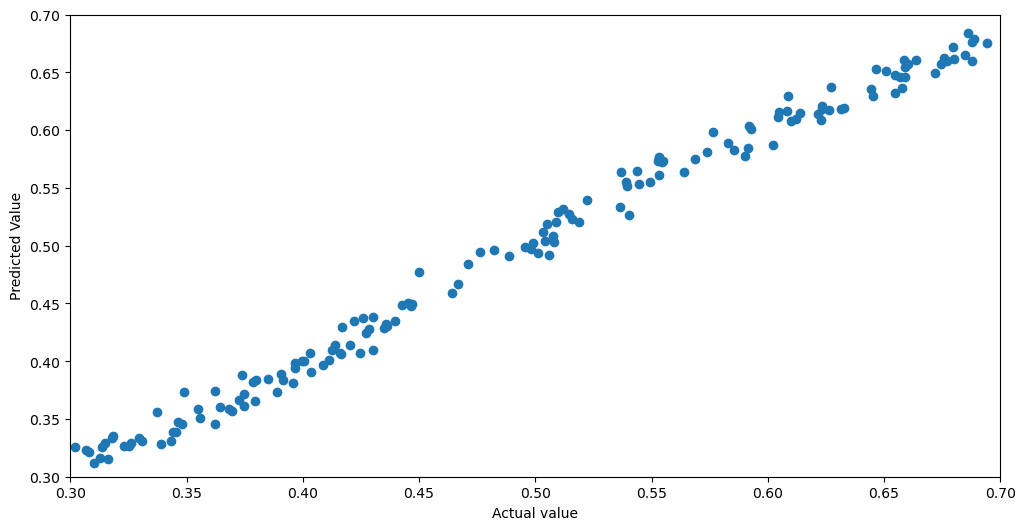

In [21]:

plt.scatter(Y,predictions)
plt.xlim(0.3,0.7)
plt.ylim(0.3,0.7)
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.show

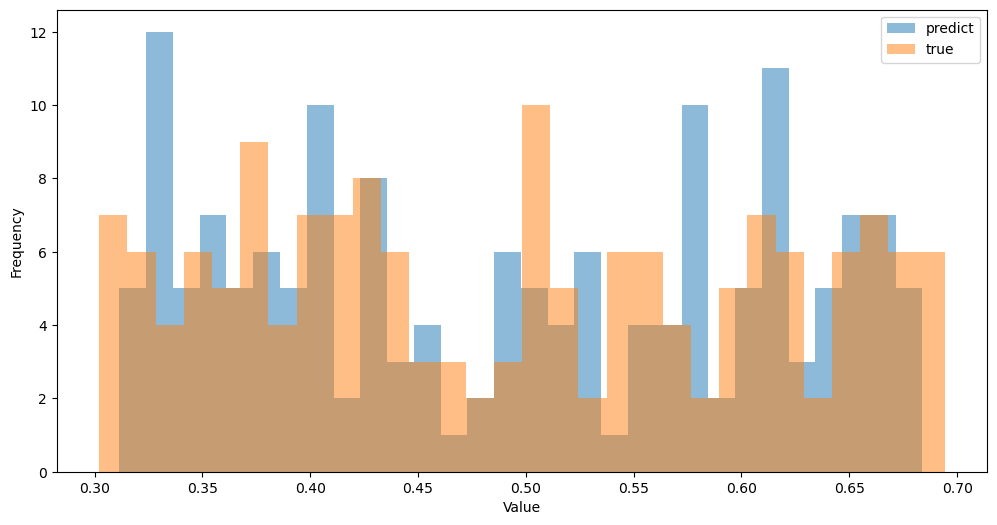

In [22]:
plt.hist(predictions, bins=30, alpha=0.5, label='predict')
plt.hist(Y, bins=30, alpha=0.5, label='true')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [23]:
print(predictions)
print(Y)

[array(0.34730971), array(0.65485776), array(0.58127285), array(0.49622915), array(0.42414754), array(0.43449193), array(0.33552559), array(0.40601811), array(0.41422181), array(0.60351445), array(0.57657255), array(0.38905233), array(0.34597181), array(0.63705118), array(0.36081), array(0.61753948), array(0.66511333), array(0.31152943), array(0.51876234), array(0.52092223), array(0.53319776), array(0.48421951), array(0.35899839), array(0.61938243), array(0.62096339), array(0.52355291), array(0.32616104), array(0.39876538), array(0.34523498), array(0.50875256), array(0.60839079), array(0.63607514), array(0.57636795), array(0.49738333), array(0.64611058), array(0.61851867), array(0.38365751), array(0.67904507), array(0.31657336), array(0.36073097), array(0.60088333), array(0.33332934), array(0.40733321), array(0.53920068), array(0.64651151), array(0.40986041), array(0.57302556), array(0.43443793), array(0.35620294), array(0.39671873), array(0.42995492), array(0.40002076), array(0.572837

In [24]:
X_test=xtv_test_log
Y_test=ytv_test_log
test_predictions = [QNN(weights, x) for x in X_test]

test_R2 = R2(Y_test, test_predictions)
test_MSE=metrics.mean_squared_error(Y_test,test_predictions)
test_RMSE=test_MSE**(1/2)
test_MAE=metrics.mean_absolute_error(Y_test,test_predictions)
test_MAPE=metrics.mean_absolute_percentage_error(Y_test,test_predictions)

print("train_MSE:",test_MSE)
print("train_RMSE:",test_RMSE)
print("train_MAE:",test_MAE)
print("train_MAPE:",test_MAPE)
print("train_R2:",test_R2)

train_MSE: 0.00019186503531691613
train_RMSE: 0.013851535485891669
train_MAE: 0.011725946580817475
train_MAPE: 0.025932133732147762
train_R2: 0.986174235378814


In [25]:
X1,Y1=bsm_iv_generator(num_sample = 5000,tao_bound=[0.5,0.6],  sigma_bound=[0.3,0.7], 
                                      money_bound=[0.98,1.02], rr_bound=[0.03,0.08],callput='call')
X1,Y1=logscale_vol(X1,Y1,otm_lower=1e-4)

In [26]:

test1_predictions = [QNN(weights, x) for x in X1]

test1_R2 = R2(Y1, test1_predictions)
test1_MSE=metrics.mean_squared_error(Y1,test1_predictions)
test1_RMSE=test1_MSE**(1/2)
test1_MAE=metrics.mean_absolute_error(Y1,test1_predictions)
test1_MAPE=metrics.mean_absolute_percentage_error(Y1,test1_predictions)

print("train_MSE:",test1_MSE)
print("train_RMSE:",test1_RMSE)
print("train_MAE:",test1_MAE)
print("train_MAPE:",test1_MAPE)
print("train_R2:",test1_R2)

train_MSE: 0.00015275918218139056
train_RMSE: 0.012359578560023418
train_MAE: 0.010106670474740502
train_MAPE: 0.020972645170574112
train_R2: 0.9886164905713763


<function matplotlib.pyplot.show(close=None, block=None)>

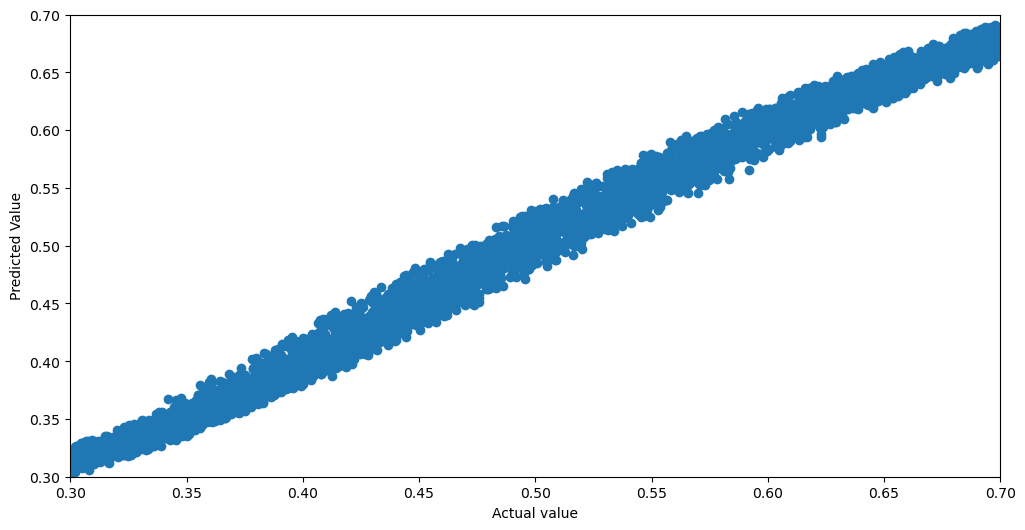

In [27]:
plt.scatter(Y1,test1_predictions)
plt.xlim(0.3,0.7)
plt.ylim(0.3,0.7)
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.show